# Fraud Detection - Data Analysis and Preprocessing
##This notebook contains the exploratory data analysis and preprocessing steps for the fraud detection project.

In [1]:
# Import required libraries
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

# Append parent directory to system path
sys.path.append('..')
from src.data_analysis_preprocessing import load_datasets, handle_missing_values, remove_duplicates, convert_datatypes, scale_numerical_features, encode_categorical_features, ip_to_int, create_time_features,prepare_ip_data,convert_scientific_to_ip, create_transaction_features

# Set plotting style
sns.set_palette('Set2')


In [3]:
# Load the datasets
fraud_data, ip_country_data, credit_card_data = load_datasets()

# Display basic information about each dataset
print("Fraud Data Info:")
print(fraud_data.info())
display(fraud_data.head())

print("\nIP Country Data Info:")
print(ip_country_data.info())
display(ip_country_data.head())

print("\nCredit Card Data Info:")
print(credit_card_data.info())
display(credit_card_data.head())


Fraud Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0



IP Country Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China



Credit Card Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Missing Values Analysis

In [4]:
def plot_missing_values(df, title):
    """Plot missing values in dataset."""
    missing_values = df.isnull().sum()
    if missing_values.sum() == 0:
        print(f"No missing values found in {title}")
        return
    
    plt.figure(figsize=(10, 6))
    missing_values[missing_values > 0].plot(kind='bar')
    plt.title(f'Missing Values in {title}')
    plt.xlabel('Columns')
    plt.ylabel('Count of Missing Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Analyze missing values in each dataset
plot_missing_values(fraud_data, 'Fraud Data')
plot_missing_values(ip_country_data, 'IP Country Data')
plot_missing_values(credit_card_data, 'Credit Card Data')

No missing values found in Fraud Data
No missing values found in IP Country Data
No missing values found in Credit Card Data


## 3. Data Cleaning

In [5]:
# Handle missing values
fraud_data_cleaned = handle_missing_values(fraud_data)
ip_country_data_cleaned = handle_missing_values(ip_country_data)
credit_card_data_cleaned = handle_missing_values(credit_card_data)

# Remove duplicates
fraud_data_cleaned = remove_duplicates(fraud_data_cleaned)
ip_country_data_cleaned = remove_duplicates(ip_country_data_cleaned)
credit_card_data_cleaned = remove_duplicates(credit_card_data_cleaned)

# Convert datatypes
fraud_data_cleaned = convert_datatypes(fraud_data_cleaned)

## 4. Exploratory Data Analysis
### 4.1 Fraud Data Analysis

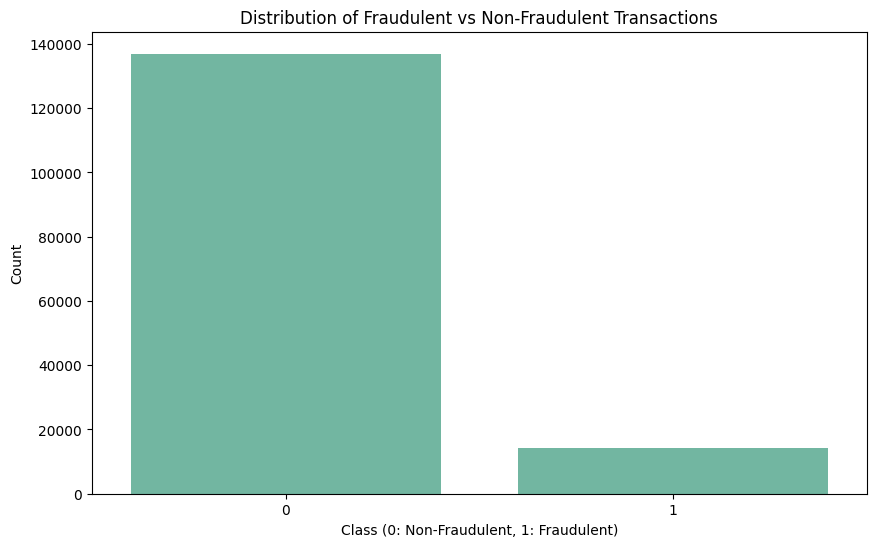

Fraud Percentage: 9.36%
Non-Fraud Percentage: 90.64%


In [6]:
# Fraud Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud_data_cleaned, x='class')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

# Calculate fraud percentage
fraud_percentage = (fraud_data_cleaned['class'].value_counts(normalize=True) * 100).round(2)
print(f"Fraud Percentage: {fraud_percentage[1]}%")
print(f"Non-Fraud Percentage: {fraud_percentage[0]}%")

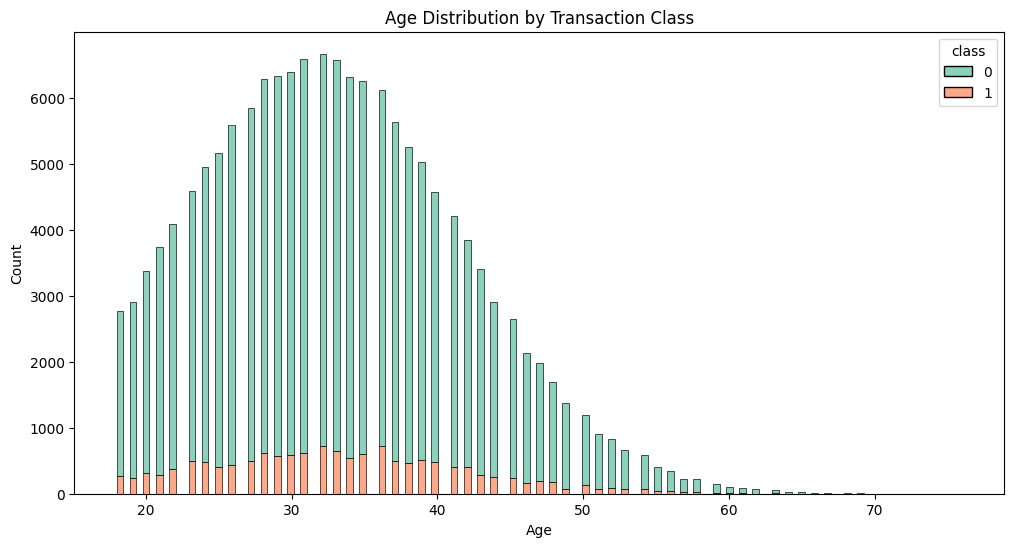

In [7]:
# Age Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=fraud_data_cleaned, x='age', hue='class', multiple="stack")
plt.title('Age Distribution by Transaction Class')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

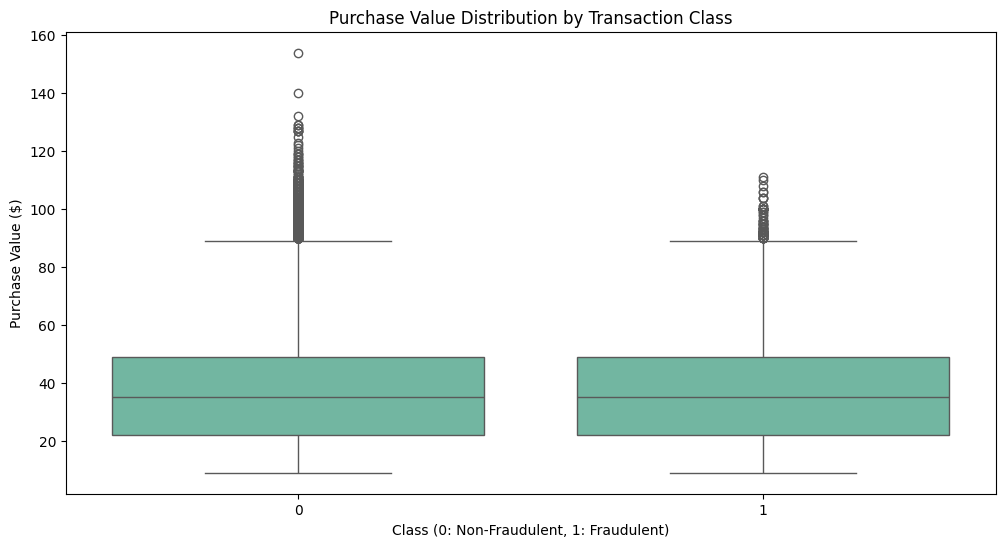

In [8]:
# Purchase Value Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=fraud_data_cleaned, x='class', y='purchase_value')
plt.title('Purchase Value Distribution by Transaction Class')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Purchase Value ($)')
plt.show()

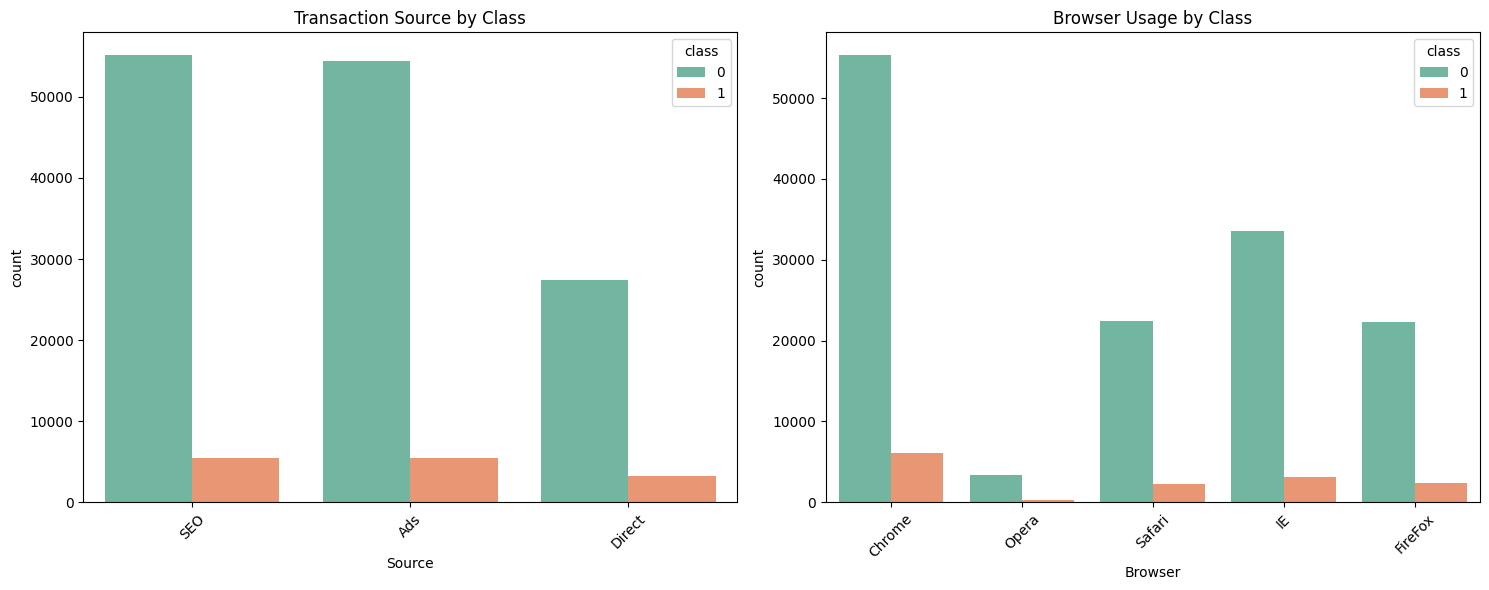

In [9]:
# Source and Browser Analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Source distribution
sns.countplot(data=fraud_data_cleaned, x='source', hue='class', ax=ax1)
ax1.set_title('Transaction Source by Class')
ax1.set_xlabel('Source')
ax1.tick_params(axis='x', rotation=45)

# Browser distribution
sns.countplot(data=fraud_data_cleaned, x='browser', hue='class', ax=ax2)
ax2.set_title('Browser Usage by Class')
ax2.set_xlabel('Browser')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 4.2 Credit Card Data Analysis

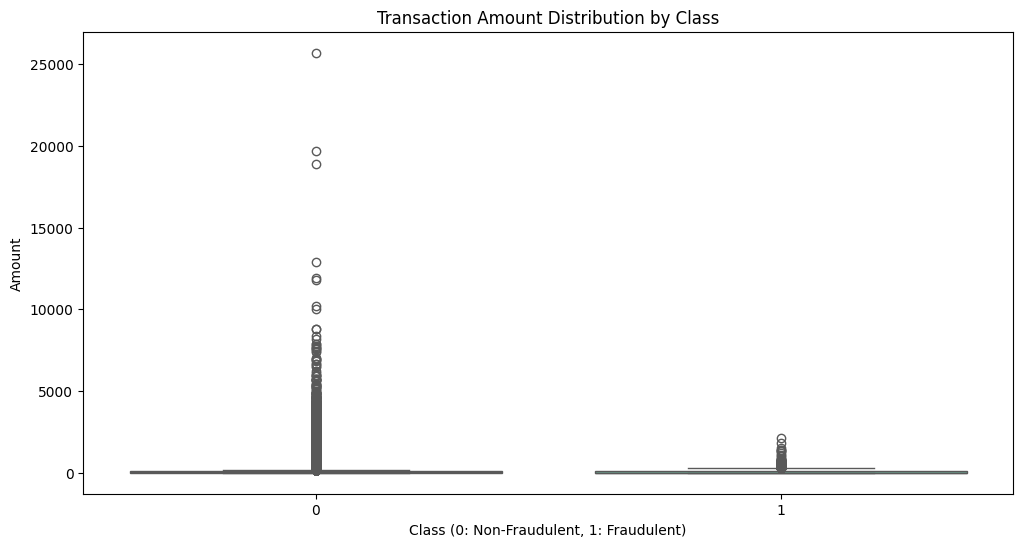

In [10]:
# Transaction Amount Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=credit_card_data_cleaned, x='Class', y='Amount')
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Amount')
plt.show()

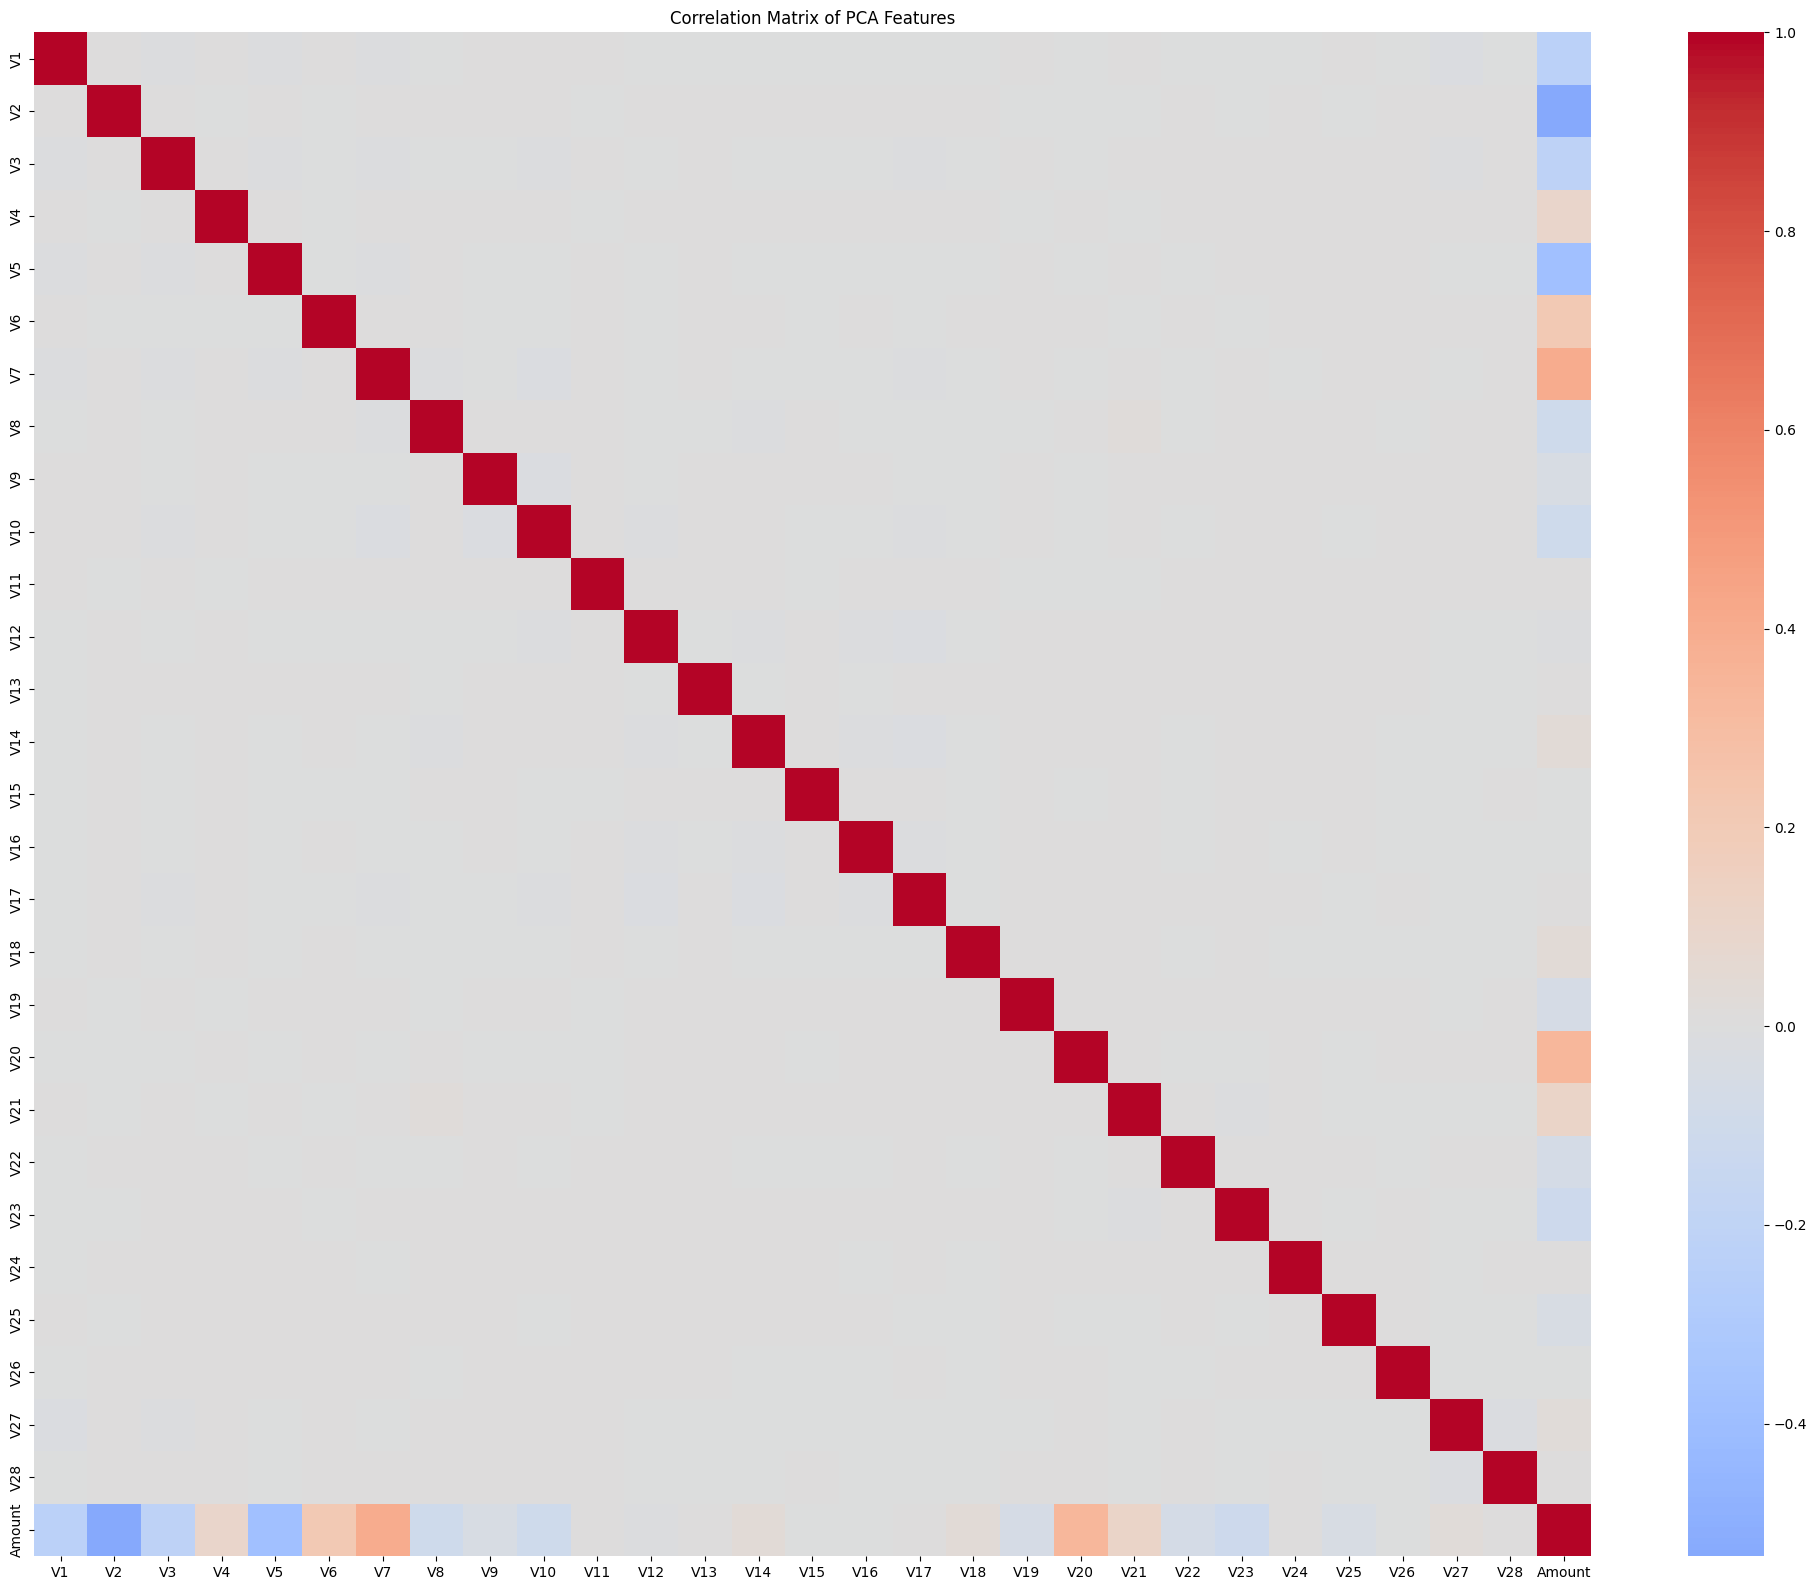

In [11]:
# Correlation Analysis of V1-V28 features
plt.figure(figsize=(20, 16))
correlation_matrix = credit_card_data_cleaned.iloc[:, 1:30].corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Matrix of PCA Features')
plt.tight_layout()
plt.show()

### 4.3 Time-Based Analysis

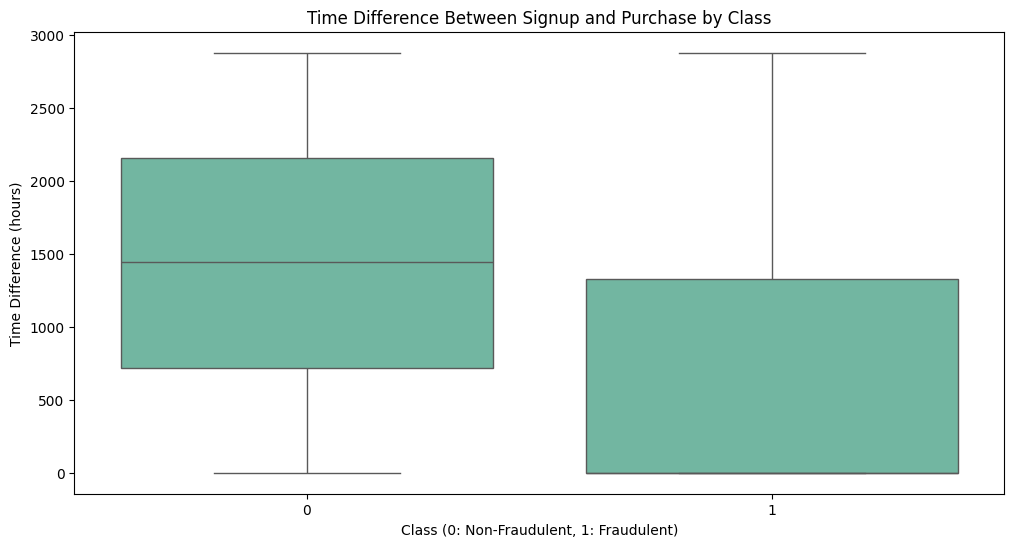

In [12]:
# Calculate time difference between signup and purchase
fraud_data_cleaned['time_diff'] = (fraud_data_cleaned['purchase_time'] - 
                                     fraud_data_cleaned['signup_time']).dt.total_seconds() / 3600  # Convert to hours

plt.figure(figsize=(12, 6))
sns.boxplot(data=fraud_data_cleaned, x='class', y='time_diff')
plt.title('Time Difference Between Signup and Purchase by Class')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Time Difference (hours)')
plt.show()

## 5. Data Preprocessing

In [13]:
# Save processed datasets
fraud_data_cleaned.to_csv('../data/processed/fraud_data_processed.csv', index=False)
display(fraud_data_cleaned.head())
credit_card_data_cleaned.to_csv('../data/processed/credit_card_data_processed.csv', index=False)
display(credit_card_data_cleaned.head())
ip_country_data_cleaned.to_csv('../data/processed/ip_country_data_processed.csv', index=False)
display(ip_country_data_cleaned.head())

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_diff
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,1251.856111
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,4.984444
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0.000278
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,136.690278
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1211.516944


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


## 5. Advanced Data Preprocessing
### 5.1 Geolocation Analysis and Data Merging

In [14]:
# Load the processed datasets
print("Loading processed datasets...")
fraud_data_cleaned = pd.read_csv('../data/processed/fraud_data_processed.csv')
ip_country_data_cleaned = pd.read_csv('../data/processed/ip_country_data_processed.csv')

# Display initial information
print("\nProcessed data shapes:")
print(f"Fraud data: {fraud_data_cleaned.shape}")
print(f"IP-Country data: {ip_country_data_cleaned.shape}")

Loading processed datasets...

Processed data shapes:
Fraud data: (151112, 12)
IP-Country data: (138846, 3)


In [15]:
# Display sample of IP addresses before conversion
print("\nSample of processed IP addresses:")
display(fraud_data_cleaned['ip_address'].head())
print("\nSample of processed IP ranges:")
display(ip_country_data_cleaned[['lower_bound_ip_address', 'upper_bound_ip_address', 'country']].head())


Sample of processed IP addresses:


0    7.327584e+08
1    3.503114e+08
2    2.621474e+09
3    3.840542e+09
4    4.155831e+08
Name: ip_address, dtype: float64


Sample of processed IP ranges:


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [ ]:
# Merge datasets and convert IP addresses
from src.data_analysis_preprocessing import prepare_ip_data
merged_data = prepare_ip_data(fraud_data_cleaned, ip_country_data_cleaned)

Converting IP addresses to standard format...
Converting IPs to integers for matching...

Total records in fraud data: 151112
Valid IP conversions: 151112

Matching IPs with country ranges...
Processed 0 records...
Processed 10000 records...
Processed 20000 records...
Processed 30000 records...
Processed 40000 records...
Processed 50000 records...
Processed 60000 records...
Processed 70000 records...
Processed 80000 records...
Processed 90000 records...
Processed 100000 records...
Processed 110000 records...
Processed 120000 records...
Processed 130000 records...
Processed 140000 records...
Processed 150000 records...

Matched 129146 IPs with countries (85.46%)


In [17]:
# Save the merged data
merged_data.to_csv('../data/processed/fraud_data_with_country.csv', index=False)
print("\nMerged data saved to: '../data/processed/fraud_data_with_country.csv'")
display(merged_data.head())



Merged data saved to: '../data/processed/fraud_data_with_country.csv'


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_diff,ip_string,ip_int,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,1251.856111,43.173.1.96,732758368,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,4.984444,20.225.83.219,350311387,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0.000278,156.64.132.28,2621473820,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,136.690278,228.234.6.235,3840542443,None
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1211.516944,24.197.75.141,415583117,United States


In [18]:
# Analyze the results
print("\nCountry distribution in merged data:")
display(merged_data['country'].value_counts(dropna=False))


Country distribution in merged data:


country
United States     58049
None              21966
China             12038
Japan              7306
United Kingdom     4490
                  ...  
Yemen                 1
San Marino            1
Burundi               1
Nauru                 1
Guadeloupe            1
Name: count, Length: 182, dtype: int64

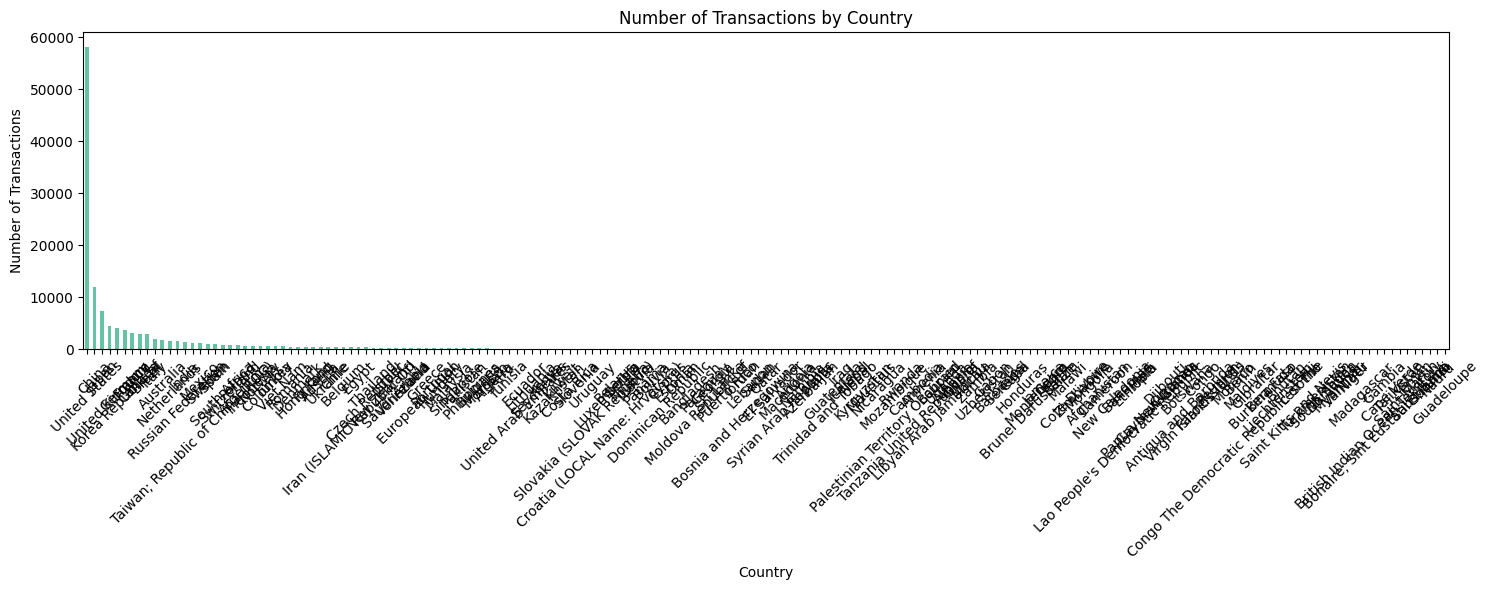

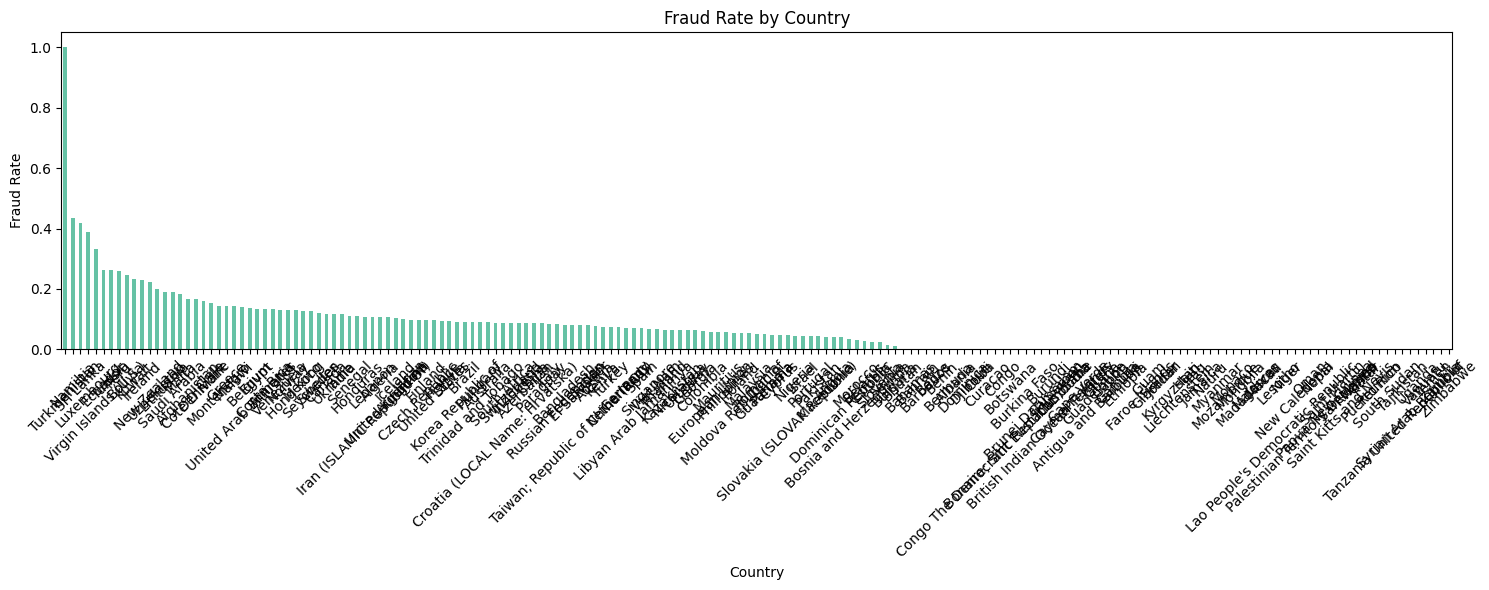

In [19]:
# Visualize country distribution
if merged_data['country'].notna().sum() > 0:
    # Create a figure for country distribution
    plt.figure(figsize=(15, 6))
    country_counts = merged_data['country'].value_counts()
    country_counts.plot(kind='bar')
    plt.title('Number of Transactions by Country')
    plt.xlabel('Country')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Create a figure for fraud rates
    plt.figure(figsize=(15, 6))
    fraud_by_country = merged_data.groupby('country')['class'].mean().sort_values(ascending=False)
    fraud_by_country.plot(kind='bar')
    plt.title('Fraud Rate by Country')
    plt.xlabel('Country')
    plt.ylabel('Fraud Rate')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [21]:
 # Display detailed statistics
print("\nFraud statistics by country:")
country_stats = merged_data.groupby('country').agg({
        'class': ['count', 'mean'],
        'ip_address': 'count'
    }).round(4)
country_stats.columns = ['Total Transactions', 'Fraud Rate', 'IP Count']
print(country_stats.sort_values('Fraud Rate', ascending=False))



Fraud statistics by country:
                       Total Transactions  Fraud Rate  IP Count
country                                                        
Turkmenistan                            1      1.0000         1
Namibia                                23      0.4348        23
Sri Lanka                              31      0.4194        31
Luxembourg                             72      0.3889        72
Virgin Islands (U.S.)                   3      0.3333         3
...                                   ...         ...       ...
Uganda                                 13      0.0000        13
Vanuatu                                 1      0.0000         1
Yemen                                   1      0.0000         1
Zambia                                 10      0.0000        10
Zimbabwe                                6      0.0000         6

[181 rows x 3 columns]


### 5.2 Feature Engineering

In [22]:
# Load the merged data
print("Loading merged data...")
fraud_data = pd.read_csv('../data/processed/fraud_data_with_country.csv')

Loading merged data...


In [23]:
# 1. Create Time-Based Features
print("\nCreating time-based features...")
fraud_data = create_time_features(fraud_data)


Creating time-based features...


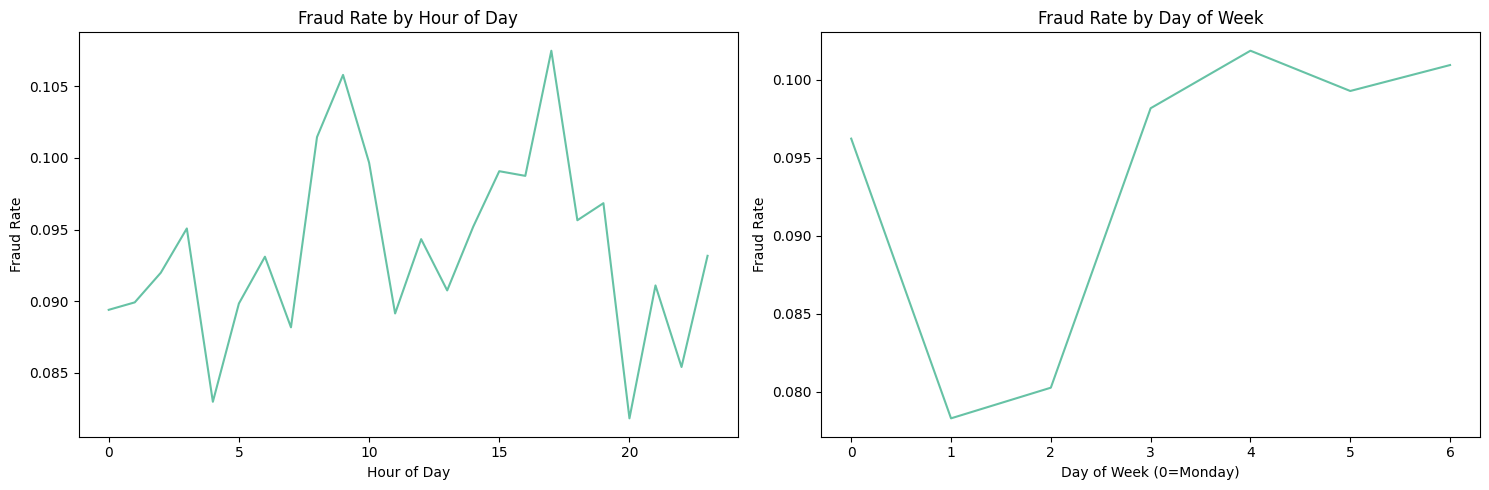

In [24]:
# Visualize time-based patterns
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
fraud_data.groupby('hour_of_day')['class'].mean().plot(kind='line')
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate')

plt.subplot(1, 2, 2)
fraud_data.groupby('day_of_week')['class'].mean().plot(kind='line')
plt.title('Fraud Rate by Day of Week')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Fraud Rate')
plt.tight_layout()
plt.show()


Creating transaction features...


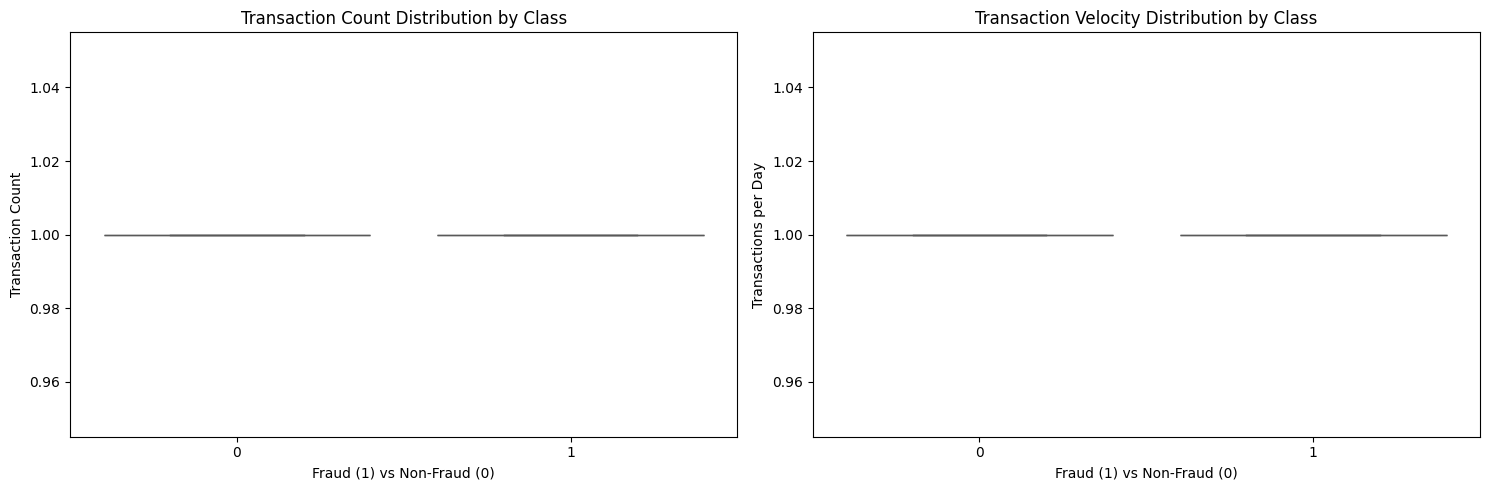

In [25]:
# 2. Create Transaction Features
print("\nCreating transaction features...")
fraud_data = create_transaction_features(fraud_data)

# Visualize transaction patterns
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='class', y='user_tx_count', data=fraud_data)
plt.title('Transaction Count Distribution by Class')
plt.xlabel('Fraud (1) vs Non-Fraud (0)')
plt.ylabel('Transaction Count')

plt.subplot(1, 2, 2)
sns.boxplot(x='class', y='tx_velocity', data=fraud_data)
plt.title('Transaction Velocity Distribution by Class')
plt.xlabel('Fraud (1) vs Non-Fraud (0)')
plt.ylabel('Transactions per Day')
plt.tight_layout()
plt.show()

### 5.3 Feature Encoding and Scaling

In [26]:
# 3. Encode Categorical Features
print("\nEncoding categorical features...")
fraud_data_encoded, encoders = encode_categorical_features(fraud_data)

# Display encoding results
print("\nEncoded categorical features:")
for column in encoders.keys():
    print(f"\n{column} encoding mapping:")
    for i, category in enumerate(encoders[column].classes_):
        print(f"{category} -> {i}")



Encoding categorical features...

Encoded categorical features:

source encoding mapping:
Ads -> 0
Direct -> 1
SEO -> 2

browser encoding mapping:
Chrome -> 0
FireFox -> 1
IE -> 2
Opera -> 3
Safari -> 4

sex encoding mapping:
F -> 0
M -> 1

country encoding mapping:
Afghanistan -> 0
Albania -> 1
Algeria -> 2
Angola -> 3
Antigua and Barbuda -> 4
Argentina -> 5
Armenia -> 6
Australia -> 7
Austria -> 8
Azerbaijan -> 9
Bahamas -> 10
Bahrain -> 11
Bangladesh -> 12
Barbados -> 13
Belarus -> 14
Belgium -> 15
Belize -> 16
Benin -> 17
Bermuda -> 18
Bhutan -> 19
Bolivia -> 20
Bonaire; Sint Eustatius; Saba -> 21
Bosnia and Herzegowina -> 22
Botswana -> 23
Brazil -> 24
British Indian Ocean Territory -> 25
Brunei Darussalam -> 26
Bulgaria -> 27
Burkina Faso -> 28
Burundi -> 29
Cambodia -> 30
Cameroon -> 31
Canada -> 32
Cape Verde -> 33
Cayman Islands -> 34
Chile -> 35
China -> 36
Colombia -> 37
Congo -> 38
Congo The Democratic Republic of The -> 39
Costa Rica -> 40
Cote D'ivoire -> 41
Croatia (LOC

In [28]:
# 4. Scale Numerical Features
print("\nScaling numerical features...")
fraud_data_scaled, scaler = scale_numerical_features(fraud_data_encoded)

# Display summary of scaled features
print("\nScaled numerical features summary:")
numerical_columns = fraud_data_scaled.select_dtypes(include=[np.number]).columns
display(fraud_data_scaled[numerical_columns].describe())



Scaling numerical features...


c:\Users\hp\Documents\FraudDetectionAI\.venv\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\hp\Documents\FraudDetectionAI\.venv\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\hp\Documents\FraudDetectionAI\.venv\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count



Scaled numerical features summary:


,user_id,purchase_value,age,ip_address,class,time_diff,ip_int,hour_of_day,day_of_week,is_weekend,...,user_avg_purchase,user_std_purchase,user_max_purchase,user_min_purchase,user_time_range_days,tx_velocity,source_encoded,browser_encoded,sex_encoded,country_encoded
count,151112.000000,1.511120e+05,1.511120e+05,1.511120e+05,151112.000000,151112.000000,1.511120e+05,151112.000000,151112.000000,151112.000000,...,1.511120e+05,0.0,1.511120e+05,1.511120e+05,151112.0,151112.0,151112.000000,151112.000000,151112.000000,151112.000000
mean,200171.040970,4.006184e-17,8.614235e-17,2.152145e+09,0.093646,1370.008125,2.152145e+09,11.521593,3.011819,0.288945,...,4.006184e-17,NaN,4.006184e-17,4.006184e-17,0.0,0.0,1.004857,1.374874,0.584288,130.461532
std,115369.285024,1.000003e+00,1.000003e+00,1.248497e+09,0.291336,868.406422,1.248497e+09,6.912474,2.006203,0.453274,...,1.000003e+00,NaN,1.000003e+00,1.000003e+00,0.0,0.0,0.892960,1.440658,0.492846,57.091576
min,2.000000,-1.524632e+00,-1.756930e+00,5.209350e+04,0.000000,0.000278,5.209300e+04,0.000000,0.000000,0.000000,...,-1.524632e+00,NaN,-1.524632e+00,-1.524632e+00,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,100642.500000,-8.151294e-01,-7.125683e-01,1.085934e+09,0.000000,607.431528,1.085934e+09,6.000000,1.000000,0.000000,...,-8.151294e-01,NaN,-8.151294e-01,-8.151294e-01,0.0,0.0,0.000000,0.000000,0.000000,82.000000
50%,199958.000000,-1.056270e-01,-1.632727e-02,2.154770e+09,0.000000,1368.429306,2.154770e+09,12.000000,3.000000,0.000000,...,-1.056270e-01,NaN,-1.056270e-01,-1.056270e-01,0.0,0.0,1.000000,1.000000,1.000000,171.000000
75%,300054.000000,6.584524e-01,6.799138e-01,3.243258e+09,0.000000,2123.479028,3.243258e+09,17.000000,5.000000,1.000000,...,6.584524e-01,NaN,6.584524e-01,6.584524e-01,0.0,0.0,2.000000,2.000000,1.000000,171.000000
max,400000.000000,6.389048e+00,4.973400e+00,4.294850e+09,1.000000,2879.992222,4.294850e+09,23.000000,6.000000,1.000000,...,6.389048e+00,NaN,6.389048e+00,6.389048e+00,0.0,0.0,2.000000,4.000000,1.000000,181.000000


### 5.4 Save Preprocessed Data

In [29]:
# Save the final preprocessed dataset
output_path = '../data/processed/fraud_data_final.csv'
fraud_data_scaled.to_csv(output_path, index=False)
print(f"\nFinal preprocessed data saved to: {output_path}")
display(fraud_data_scaled.head())


Final preprocessed data saved to: ../data/processed/fraud_data_final.csv


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,user_avg_purchase,user_std_purchase,user_max_purchase,user_min_purchase,user_time_range_days,tx_velocity,source_encoded,browser_encoded,sex_encoded,country_encoded
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,SEO,Chrome,M,0.679914,7.327584e+08,...,-0.160204,NaN,-0.160204,-0.160204,0.0,0.0,2,0,1,84
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,Ads,Chrome,F,2.304476,3.503114e+08,...,-1.142592,NaN,-1.142592,-1.142592,0.0,0.0,0,0,0,171
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,SEO,Opera,M,2.304476,2.621474e+09,...,-1.197169,NaN,-1.197169,-1.197169,0.0,0.0,2,3,1,171
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,SEO,Safari,M,0.911994,3.840542e+09,...,0.385567,NaN,0.385567,0.385567,0.0,0.0,2,4,1,181
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,Ads,Safari,M,1.376155,4.155831e+08,...,0.112681,NaN,0.112681,0.112681,0.0,0.0,0,4,1,171


In [30]:
# Display final feature list
print("\nFinal features in the dataset:")
for column in fraud_data_scaled.columns:
    print(f"- {column}")


Final features in the dataset:
- user_id
- signup_time
- purchase_time
- purchase_value
- device_id
- source
- browser
- sex
- age
- ip_address
- class
- time_diff
- ip_string
- ip_int
- country
- hour_of_day
- day_of_week
- is_weekend
- month
- time_since_signup
- user_tx_count
- user_avg_purchase
- user_std_purchase
- user_max_purchase
- user_min_purchase
- user_time_range_days
- tx_velocity
- source_encoded
- browser_encoded
- sex_encoded
- country_encoded
